import and load

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

order_items_df = pd.read_csv('/content/drive/MyDrive/EDEM/TFM/Tablas_reto 1/order_items.csv')
products_df = pd.read_csv('/content/drive/MyDrive/EDEM/TFM/Tablas_reto 1/products.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/EDEM/TFM/Tablas_reto 1/reviews.csv')
sellers_df = pd.read_csv('/content/drive/MyDrive/EDEM/TFM/Tablas_reto 1/sellers.csv')
customers_df = pd.read_csv('/content/drive/MyDrive/EDEM/TFM/Tablas_reto 1/customers.csv')
geolocalizaciones_df = pd.read_csv('/content/drive/MyDrive/EDEM/TFM/Tablas_reto 1/geolocalizaciones.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/EDEM/TFM/Tablas_reto 1/orders.csv')
order_payments_df = pd.read_csv('/content/drive/MyDrive/EDEM/TFM/Tablas_reto 1/order_payments.csv')

# data preprocessing

In [15]:
def preprocess_and_analyze(df, df_name):
    print(f"\n\n--- Análisis de datos para {df_name} ---")

    # Primeras filas del DataFrame
    print(f"\nPrimeras filas:\n{df.head().to_string(index=False)}")

    # Tipos de datos
    print(f"\nTipos de datos:\n{df.dtypes}")

    # Verificación de valores nulos
    missing_values = df.isnull().sum()
    print(f"\nValores faltantes:\n{missing_values}")

    # Verificación de duplicados
    duplicates = df.duplicated().sum()
    print(f"\nDuplicados: {duplicates}")

    # Verificación de nombres de columnas correctos
    print(f"\nNombres de columnas: {df.columns.tolist()}")

    # Estadísticas básicas
    print(f"\nEstadísticas básicas:\n{df.describe(include='all')}")

    # Visualización de la distribución de valores en las columnas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    object_columns = df.select_dtypes(include=['object']).columns

    if len(numeric_columns) > 0:
        df[numeric_columns].hist(bins=30, figsize=(15, 10), layout=(len(numeric_columns), 1), edgecolor='k', alpha=0.7)
        plt.suptitle(f'Distribución de valores en columnas numéricas ({df_name})')
        plt.show()

    for column in object_columns:
        if df[column].nunique() < 20:  # Si hay menos de 20 valores únicos, se muestra un gráfico de barras
            plt.figure(figsize=(10, 6))
            df[column].value_counts().plot(kind='bar')
            plt.title(f'Distribución de categorías en la columna {column} ({df_name})')
            plt.xlabel(column)
            plt.ylabel('Frecuencia')
            plt.grid(True)
            plt.show()

            counts = df[column].value_counts()
            small_categories = counts[counts < counts.max() * 0.05].index
            df[column] = df[column].replace(small_categories, 'Otros')
            plt.figure(figsize=(8, 8))
            df[column].value_counts().plot.pie(autopct='%1.1f%%')
            plt.title(f'Diagrama circular para la columna {column} ({df_name})')



# ORDER_ITEMS



--- Análisis de datos para order_items ---

Primeras filas:
                        order_id                       product_id                        seller_id shipping_limit_date  price  freight_value
e034f9f8187474a5b3658ff0c2f81a15 0b7b6d7fdf4b930642b1285cb1b27d74 b0ca3a35559f009cde9a73adaeb76923 2022-09-19 11:45:35  58.90          13.29
2d32bb698914d70984ac62c83f9f5a6d f1fc701f8d7ee1d1ea48ce94ff8f7e99 00100ca026c52cc489fd2ad39b56f90e 2022-05-03 13:05:13 239.90          19.93
ca80d8b7b4491087d834cb0f33c35f7a bb3b292dde43558566775aa9be8c319c 144c9aeab4325303fe0cd436e3478a8b 2023-01-18 15:48:30 199.00          17.87
f1411475545150c514c746338d34e4ac 2fa70f729b7b4197ba6b979ddb164945 67a193a464e9880e46c978bd67a78e0a 2023-08-15 12:10:18  12.99          12.79
a9eaf2aafbd838db3e9fa990f049ab6c 89e3cf1eca41576cbeaa653bb92a644d d4373b655a42dff0ed2c352535aa3729 2022-02-13 14:57:51 199.90          18.14

Tipos de datos:
order_id                object
product_id              object
seller_id    

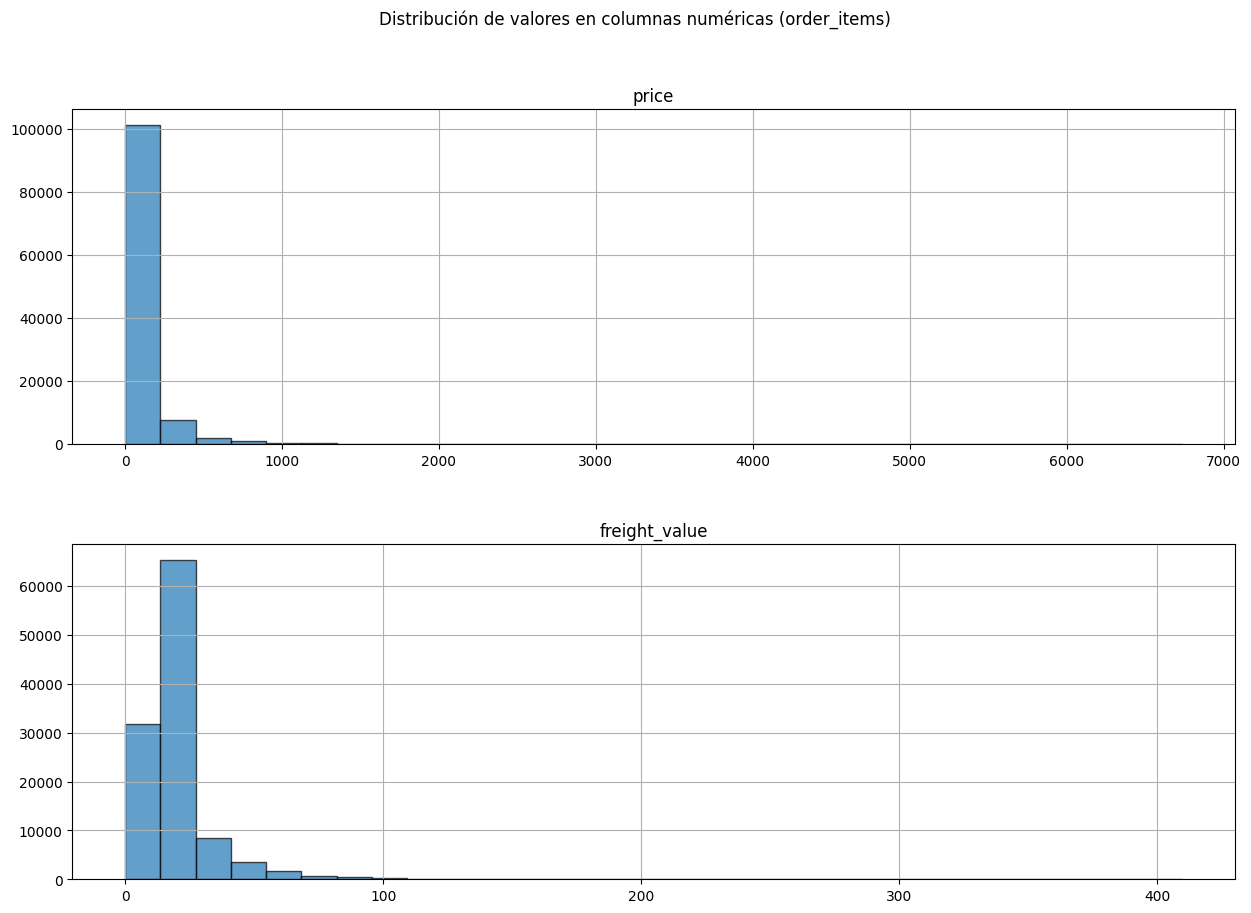

In [ ]:
preprocess_and_analyze(order_items_df, 'order_items')

In [ ]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])


order_items_df['shipping_date'] = order_items_df['shipping_limit_date'].dt.date
order_items_df['shipping_time'] = order_items_df['shipping_limit_date'].dt.time

order_items_df_cleaned = order_items_df.copy()

# **Conclucíon:**

datos estan en bien estado: sin nan. Hay duplicados, pero este no es error, este es un pedido de un artículo en cantidades de varias piezas. Esta añadido 2 columnas: una para la fecha dd/mm/yyyy y en otra la hora hh/mm/ss para los graficos en Power BI.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# PRODUCTS




--- Análisis de datos para products ---

Primeras filas:
                      product_id  category_name  weight_g  length_cm  height_cm  width_cm
aa68716e61f409a9a1094f206119ddb8      perfumery     225.0       16.0       10.0      14.0
03ab5b3cf2c9a5ab6039a9bc1f089b05            art    1000.0       30.0       18.0      20.0
1e4a30072f1b19d96ce3da120be7cada sports_leisure     154.0       18.0        9.0      15.0
6e00272a496022fdf121e65445fe3060           baby     371.0       26.0        4.0      26.0
9ae40d5c6624e048b579fb187d05cba7     housewares     625.0       20.0       17.0      13.0

Tipos de datos:
product_id        object
category_name     object
weight_g         float64
length_cm        float64
height_cm        float64
width_cm         float64
dtype: object

Valores faltantes:
product_id         0
category_name    620
weight_g           2
length_cm          2
height_cm          2
width_cm           2
dtype: int64

Duplicados: 0

Nombres de columnas: ['product_id', 'category

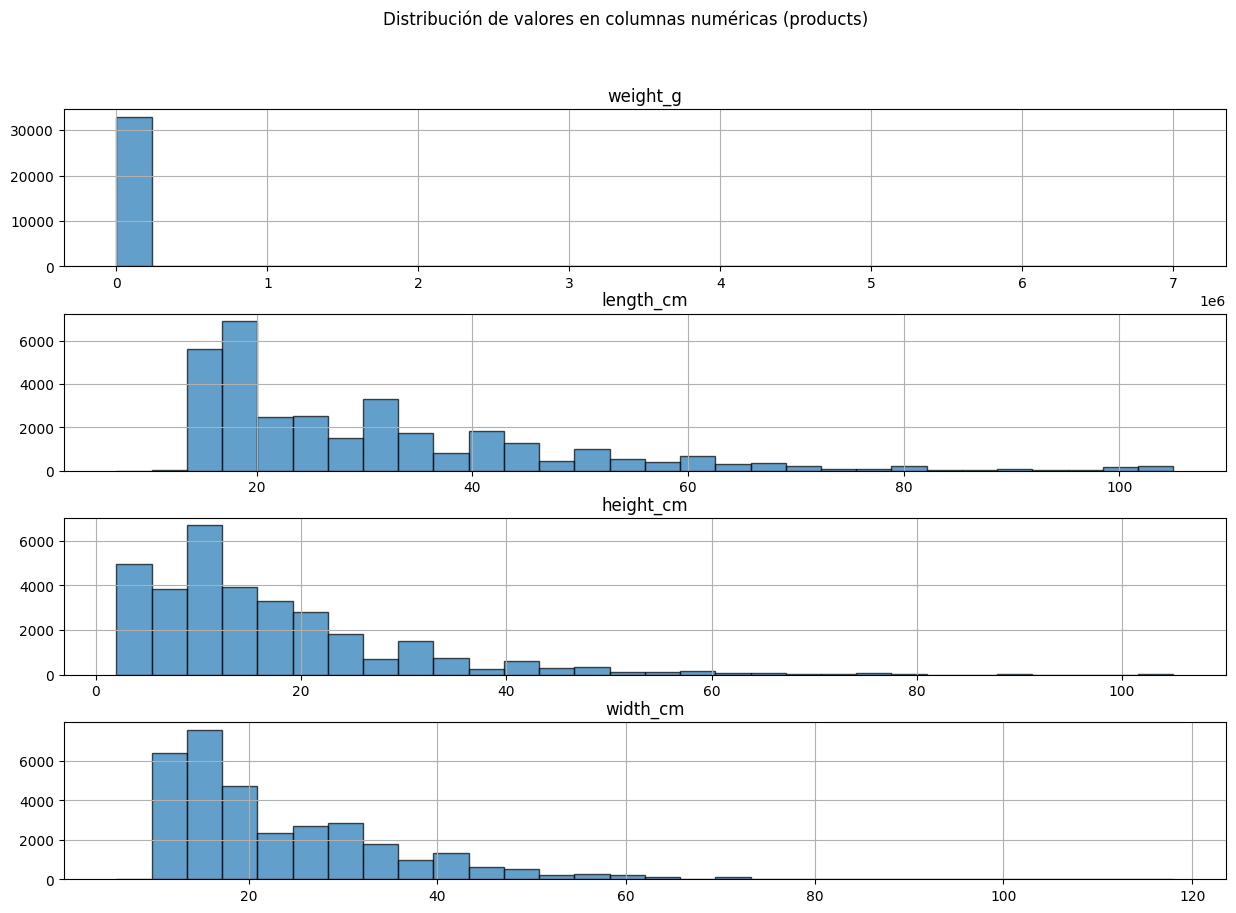

In [ ]:
preprocess_and_analyze(products_df, 'products')

Conclusion: 620 missing category_name values, as well as 2 values ​​in 'weight_g', 'length_cm', 'height_cm', 'width_cm' - deleted

In [ ]:

columns_to_check = ['category_name', 'weight_g', 'length_cm', 'height_cm', 'width_cm']
products_df_cleaned = products_df.dropna(subset=columns_to_check)




# **Conclucíon:**

datos tienen 620 Nan en category_name y por 2 Nan en las columnas 'weight_g', 'length_cm', 'height_cm', 'width_cm' - deleted

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# REVIEWS



--- Análisis de datos para reviews ---

Primeras filas:
                       review_id                         order_id score  has_comment review_creation_date review_answer_timestamp
6dfcfbbaab5833310f5fdd05dc83d906 0a5dd6592278318157d87679d109f330     4            0  2023-01-18 01:00:00     2023-01-18 22:46:59
9d449255ff8c66ecca9cdde6e908ea82 3fa1e7d63588d1a74b82affa9b003e1e     5            0  2023-03-10 01:00:00     2023-03-11 04:05:13
a7200f24b7d755f39c8465d3ce49962a cc9fa5ec8f08f922d1c7416d6b46018b     5            0  2023-02-17 01:00:00     2023-02-18 15:36:24
3adcf419637445b9a8a465732dd9edb6 719875e07cb5dff104ca3590bdcb9123     5            1  2022-04-21 02:00:00     2022-04-22 00:02:06
d4a80055586b443ec619012c6e30df7a 0da0db906205eb9d9d04e6111fa301cf     5            1  2023-03-01 01:00:00     2023-03-02 11:26:53

Tipos de datos:
review_id                  object
order_id                   object
score                      object
has_comment                 int64
review_cr

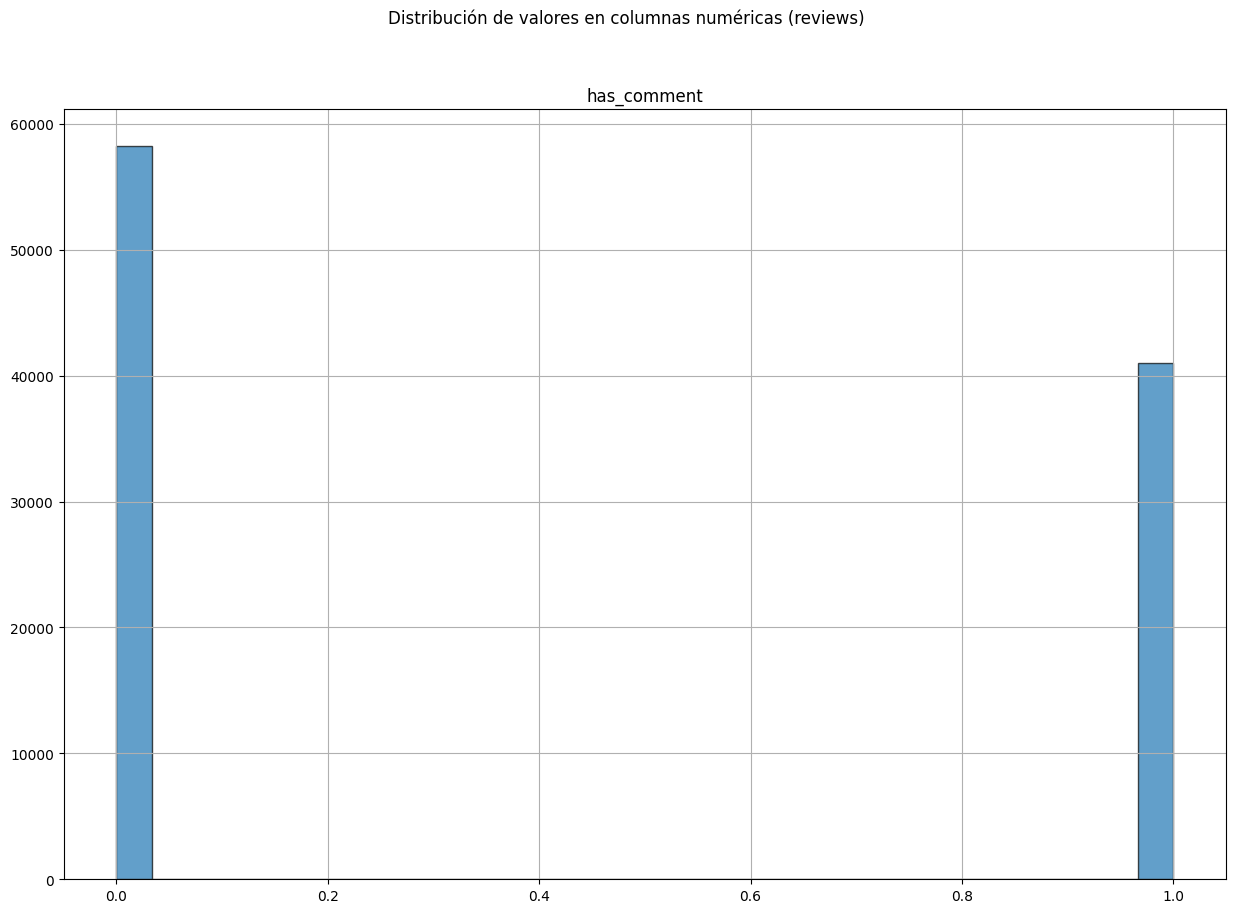

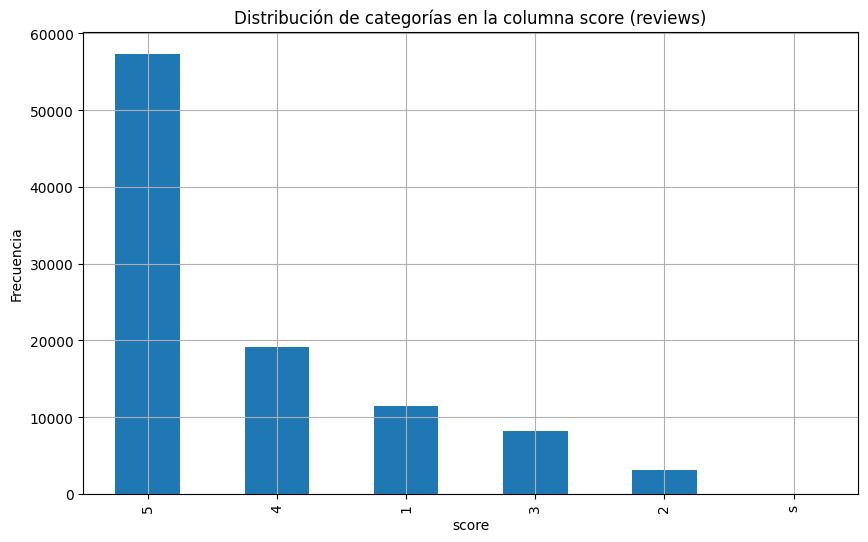

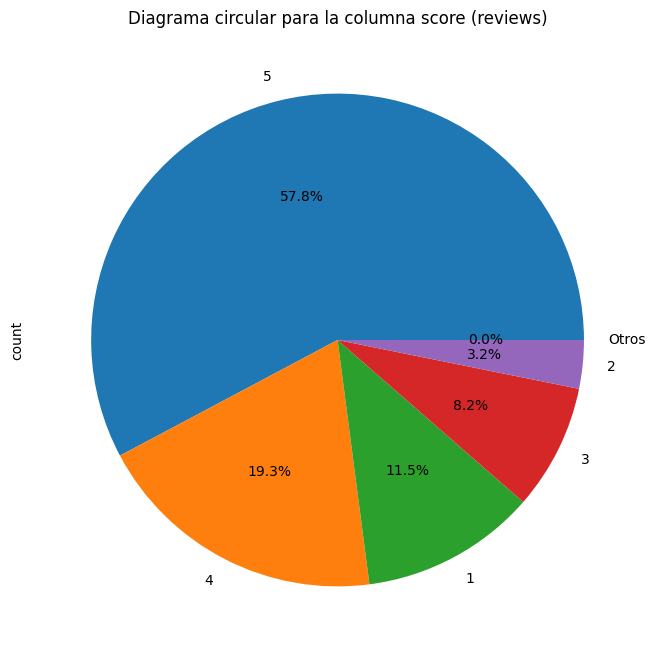

In [ ]:
preprocess_and_analyze(reviews_df, 'reviews')

Removing 1 row with value s in the score column



In [ ]:
score_counts = reviews_df['score'].value_counts()
score_counts

score
5    57327
4    19142
1    11424
3     8179
2     3151
s        1
Name: count, dtype: int64

In [ ]:

reviews_df_cleaned = reviews_df[reviews_df['score'] != 's']



Значение 's' успешно удалено из столбца 'score'


# **Conclucíon:**

datos estan en bien estado, solo la columna score tiene un valor muy raro - 's', está eliminado.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# SELLERS



--- Análisis de datos para sellers ---

Primeras filas:
                       seller_id  postal_code
1d4d325f6e9a8b3e2a34ba45c6fab13b      1248188
251058403151a0d80eb4fee3e2ee408c      1238658
851a7816c5034f490621cc8e2335b4c2      1240950
85fe9bc9e765ea6599ee57efb7375802      1245530
2ebd36cec0aa8bd78760114725fbdfa1      1248150

Tipos de datos:
seller_id      object
postal_code     int64
dtype: object

Valores faltantes:
seller_id      0
postal_code    0
dtype: int64

Duplicados: 0

Nombres de columnas: ['seller_id', 'postal_code']

Estadísticas básicas:
                               seller_id   postal_code
count                               3095  3.095000e+03
unique                              3095           NaN
top     1d4d325f6e9a8b3e2a34ba45c6fab13b           NaN
freq                                   1           NaN
mean                                 NaN  1.243930e+06
std                                  NaN  4.028435e+03
min                                  NaN  1.234581

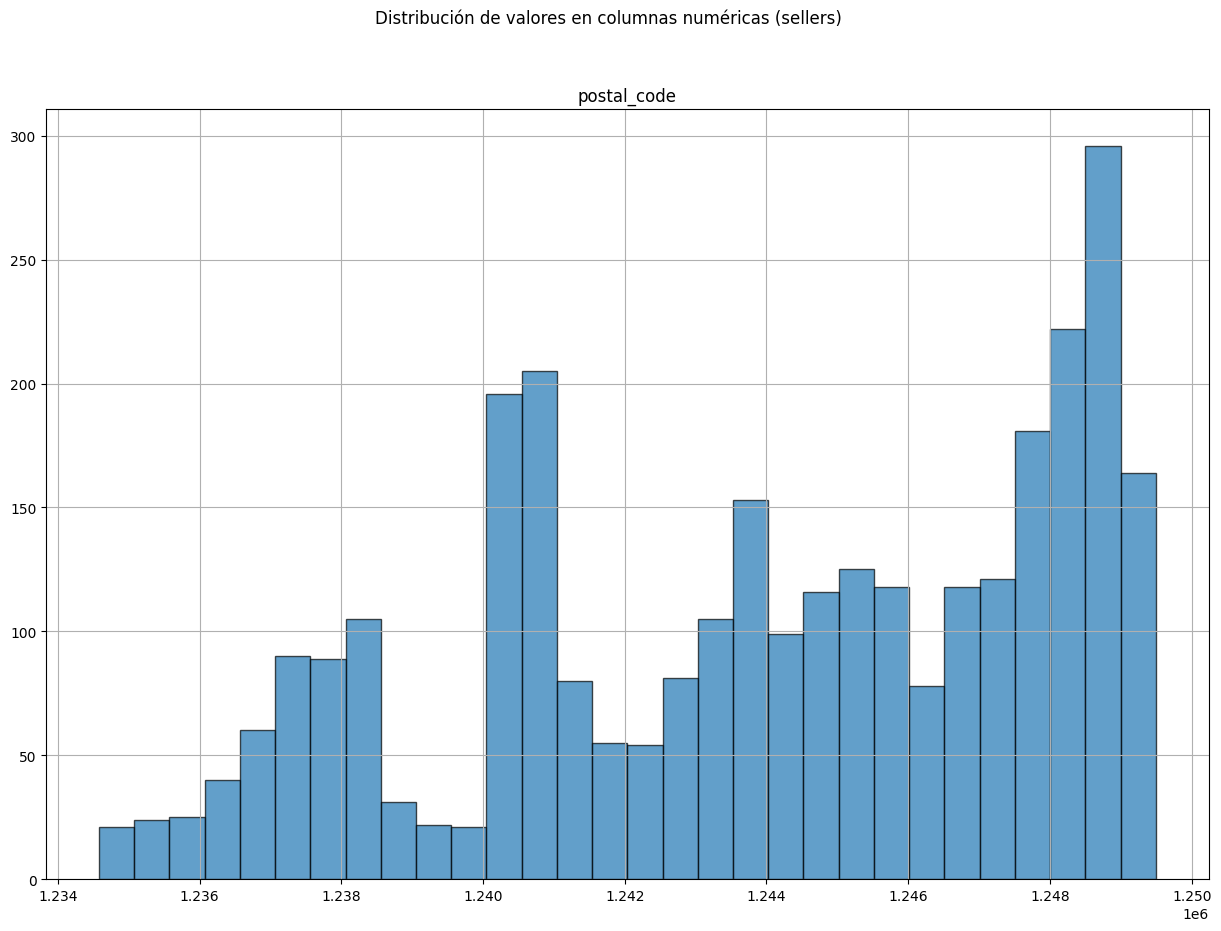

In [ ]:
preprocess_and_analyze(sellers_df, 'sellers')

# **Conclucíon:**

datos estan en bien estado

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# CUSTOMERS



--- Análisis de datos para customers ---

Primeras filas:
                     customer_id               customer_unique_id  postal_code
1f3a804d70c2dbac1a1952f846cdc51c 8a6dcbb83a88fe73e7e5e9e999270870      1248685
64574bc447d7284fdc8cbebad3f06794 8514e469697b53032cc2f8530284d254      1247707
48ae96c741274aa51e742cde999d02b5 895f54592033f6ff9ac846a91f9b811c      1243965
79c3f9c79a9ad8bea3b475595b7fe8c3 89a38d852b53f1850739565116c07c3a      1247491
f545f780ad091c00a0e9329e189b2a90 d5bebcb004762d2abfb206a4e3cbe97a      1248212

Tipos de datos:
customer_id           object
customer_unique_id    object
postal_code            int64
dtype: object

Valores faltantes:
customer_id           0
customer_unique_id    0
postal_code           0
dtype: int64

Duplicados: 0

Nombres de columnas: ['customer_id', 'customer_unique_id', 'postal_code']

Estadísticas básicas:
                             customer_id                customer_unique_id  \
count                              99441            

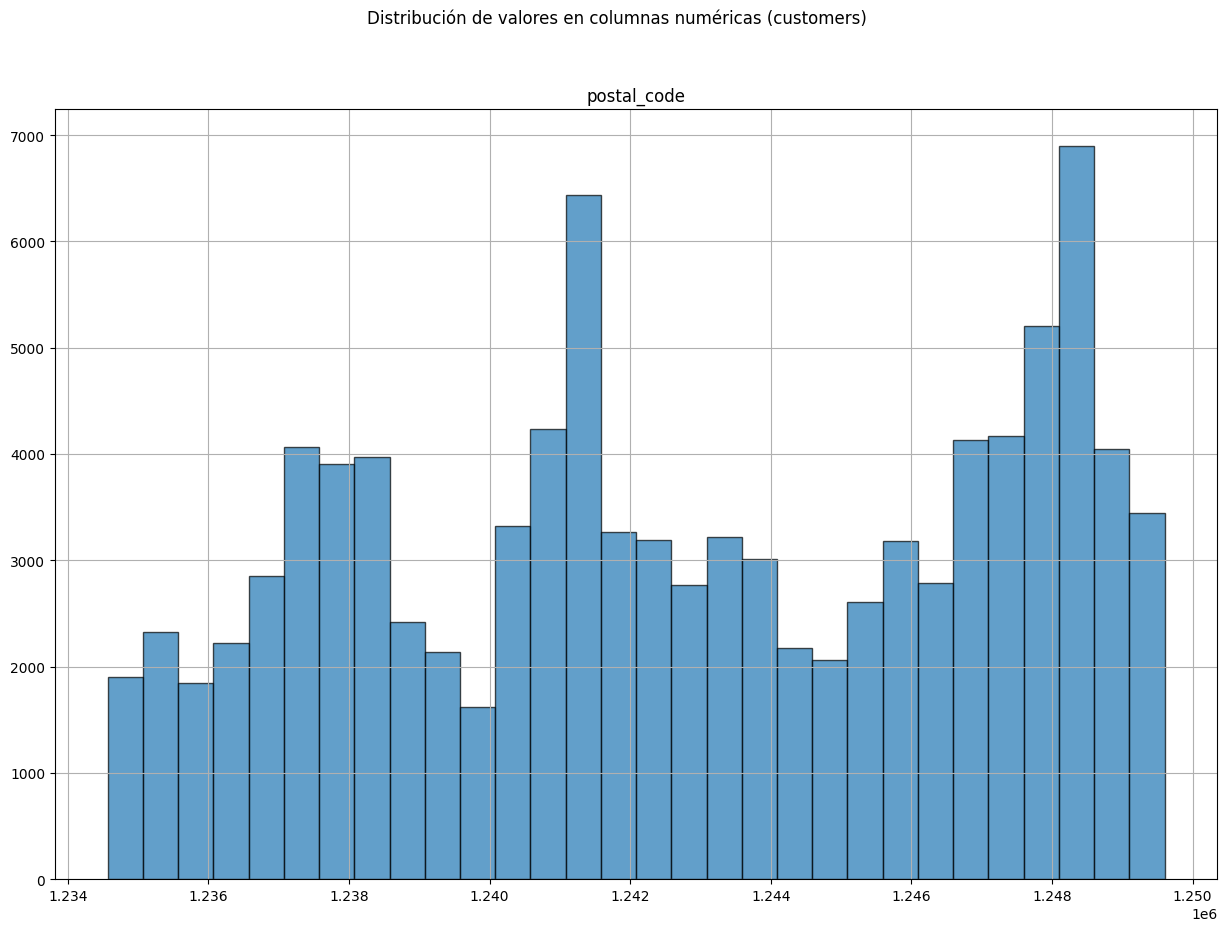

In [ ]:
preprocess_and_analyze(customers_df, 'customers')

# **Conclucíon:**

datos estan en bien estado

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# GEOLOCALIZACIONES



--- Анализ данных для geolocalizaciones ---

Первые несколько строк:
CLIENT_ISO_CODE             CITY ZIPCODE  LONGITUDE  LATITUDE   id_cp
             NL          Alkmaar 1821 ap     4.7604   52.6289 1234567
             ES           MADRID   28013    -3.7118   40.4190 1234568
             MX Playa del Carmen   77727   -87.0657   20.6519 1234569
             DE           Berlin   13591    13.1405   52.5345 1234570
             NL         Den Haag 2571 ht     4.2903   52.0689 1234571

Типы данных:
CLIENT_ISO_CODE     object
CITY                object
ZIPCODE             object
LONGITUDE          float64
LATITUDE           float64
id_cp                int64
dtype: object

Пропущенные значения:
CLIENT_ISO_CODE    0
CITY               1
ZIPCODE            0
LONGITUDE          0
LATITUDE           0
id_cp              0
dtype: int64

Дубликаты: 0

Названия колонок: ['CLIENT_ISO_CODE', 'CITY', 'ZIPCODE', 'LONGITUDE', 'LATITUDE', 'id_cp']

Основные статистики:
       CLIENT_ISO_CODE    CIT

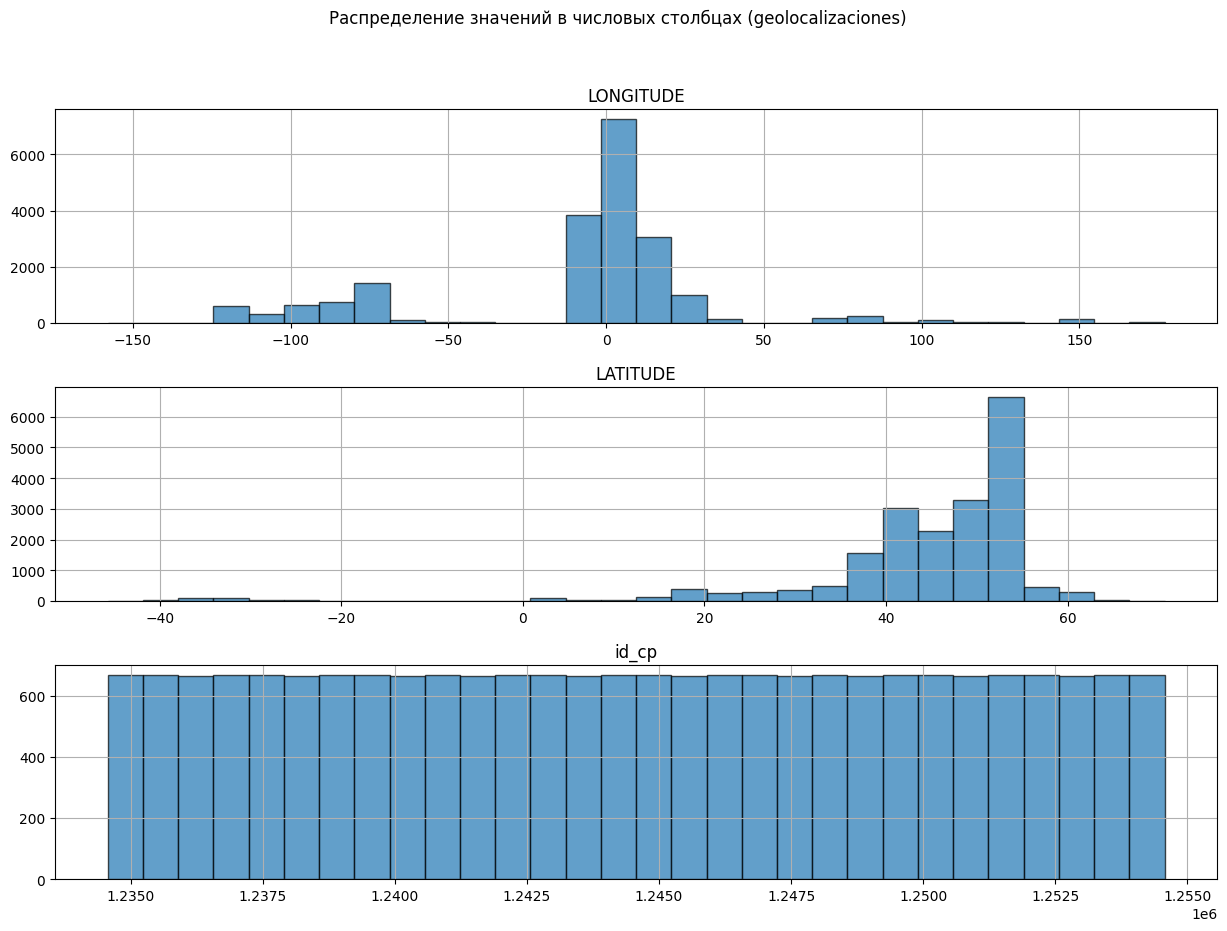

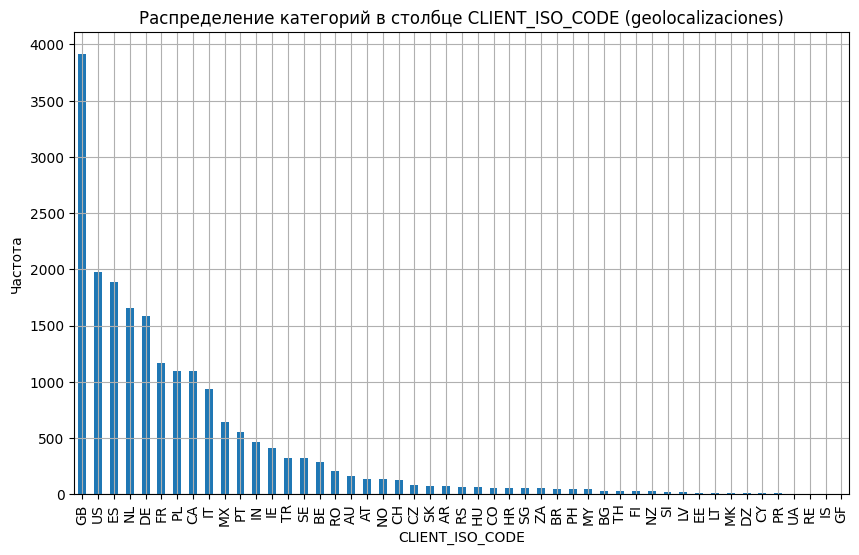

In [ ]:
preprocess_and_analyze(geolocalizaciones_df, 'geolocalizaciones')

Deleting a line with a blank in the City column

In [15]:
geolocalizaciones_df_cleaned = geolocalizaciones_df.dropna(subset=['CITY'])




Give the columns the correct heading names

In [16]:
geolocalizaciones_df_cleaned.columns = geolocalizaciones_df_cleaned.columns.str.strip().str.lower()

# **Conclucíon:**

datos tienen Nan en la columna 'city' y encabezados de columna en mayúscula

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# ORDERS



--- Análisis de datos para orders ---

Primeras filas:
                        order_id                      customer_id    status  purchase_timestamp         approved_at delivered_courier_date delivered_customer_date estimated_delivery_date
1582d3d1c7a4c1fd7b5857c7e6c084bb c1d75069901ff3b203405a36de0c653b delivered 2022-10-02 10:56:33 2022-10-02 11:07:15    2022-10-04 19:55:00     2022-10-10 21:25:13              2022-10-18
770a0411b7850b3d8f8c55cd41316eb9 d12b894fe079585668a12171ef6d3a9c delivered 2023-07-24 20:41:37 2023-07-26 03:24:27    2023-07-26 14:31:00     2023-08-07 15:27:45              2023-08-13
64cafa9458e5376e77efcce3c095e541 1df65b523d72a0bb1e1716380fb5cf81 delivered 2023-08-08 08:38:49 2023-08-08 08:55:23    2023-08-08 13:50:00     2023-08-17 18:06:29              2023-09-04
6c3c529bb633c560baf62a0713105b1a 1a732b2a6f825905c149b56f77e63e39 delivered 2022-11-18 19:28:06 2022-11-18 19:45:59    2022-11-22 13:39:59     2022-12-02 00:28:42              2022-12-15
d0fe056b

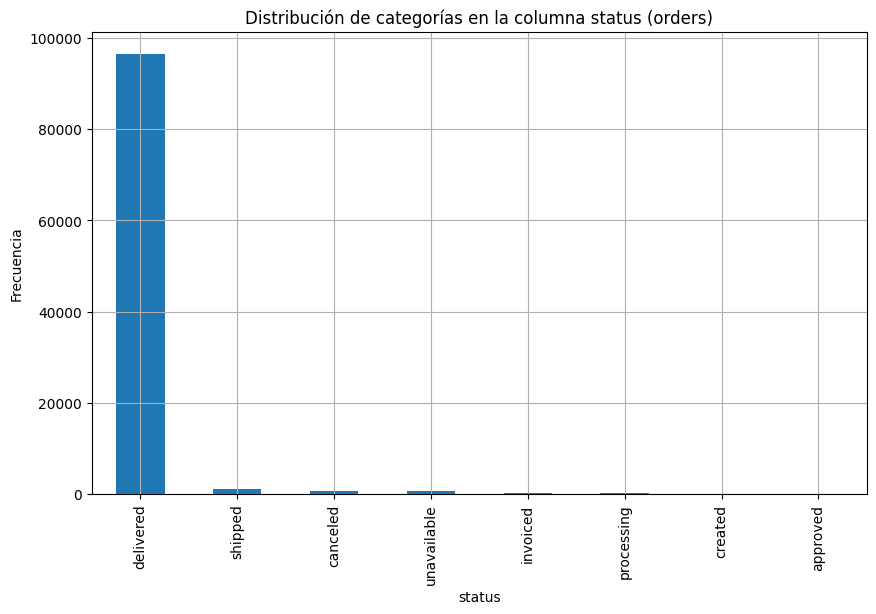

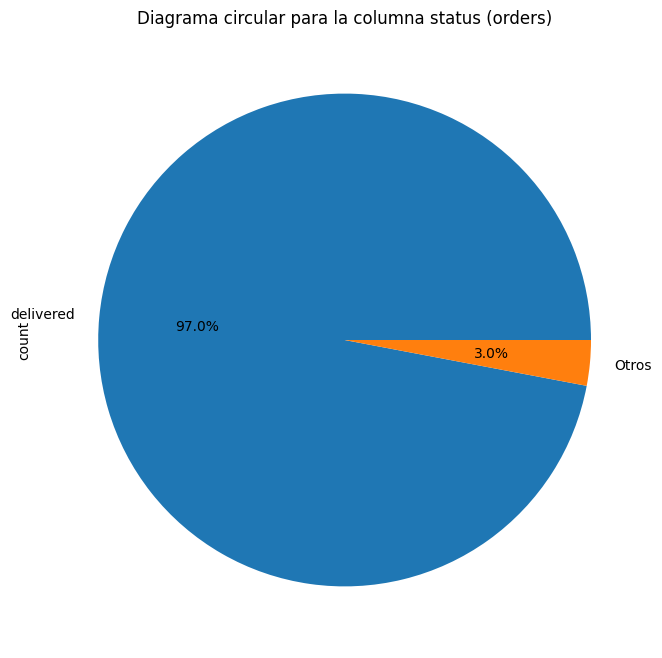

In [ ]:
preprocess_and_analyze(orders_df, 'orders')

Removing gaps in columns 'approved_at', 'delivered_courier_date', 'delivered_customer_date'

In [20]:



orders_df_cleaned = orders_df.copy()
orders_df_cleaned['approved_at'] = orders_df_cleaned['approved_at'].fillna('1970-01-01 00:00:00')
orders_df_cleaned['delivered_courier_date'] = orders_df_cleaned['delivered_courier_date'].fillna('1970-01-01 00:00:00')
orders_df_cleaned['delivered_customer_date'] = orders_df_cleaned['delivered_customer_date'].fillna('1970-01-01 00:00:00')


# **Conclucíon:**

datos tienen Nan en las columnas 'approved_at', 'delivered_courier_date', 'delivered_customer_date', pero esto es normal. Rellenar valores nulos en las columnas específicas con una fecha por defecto '1970-01-01 00:00:00'.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# ORDER_PAYMENTS



--- Análisis de datos para order_payments ---

Primeras filas:
                        order_id  sequential payment_type  installments  amount
fe2572b623f714fd1ce4a440742b42bd           1         Visa             8   99.33
9059a827bfaca55aa71cd1cbc94fab91           1         Visa             1   24.39
988adec4d20b2d6bfcc34374f6c2a81e           1         Visa             1   65.71
55da7efcdbd4bd476ba2556f5e7d11ce           1         Visa             8  107.78
a3924e81f2aa86016f3a3e3e3e440ea8           1         Visa             2  128.45

Tipos de datos:
order_id         object
sequential        int64
payment_type     object
installments      int64
amount          float64
dtype: object

Valores faltantes:
order_id        0
sequential      0
payment_type    0
installments    0
amount          0
dtype: int64

Duplicados: 0

Nombres de columnas: ['order_id', 'sequential', 'payment_type', 'installments', 'amount']

Estadísticas básicas:
                                order_id     sequent

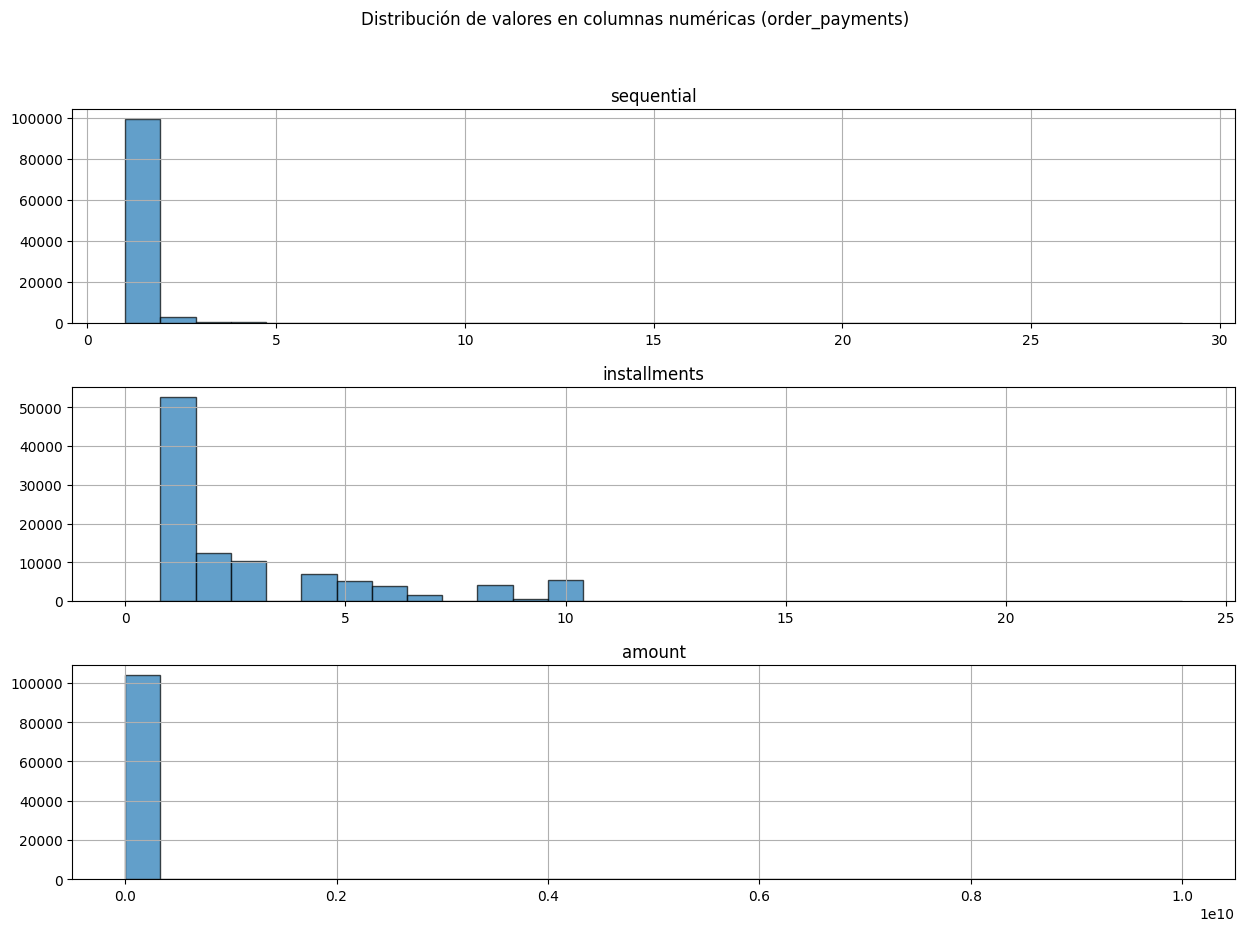

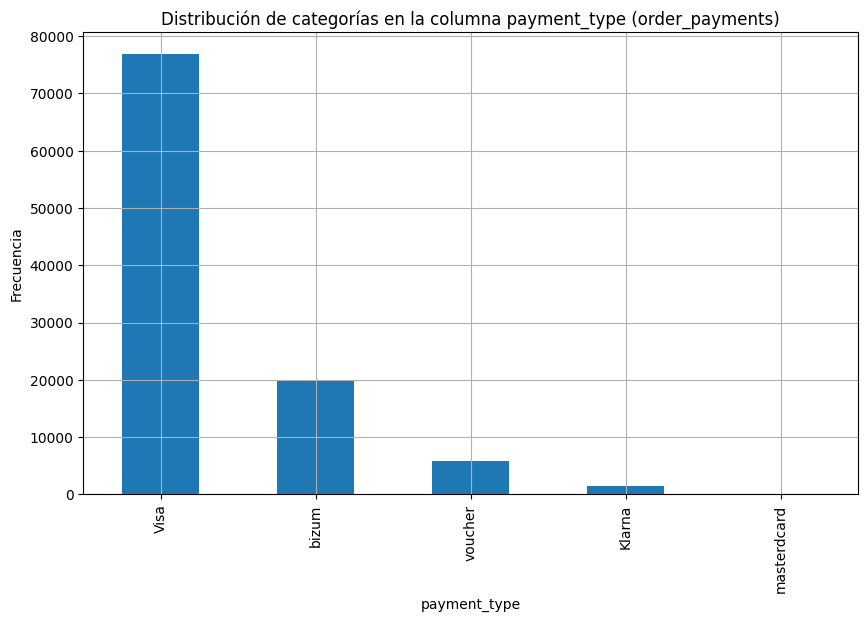

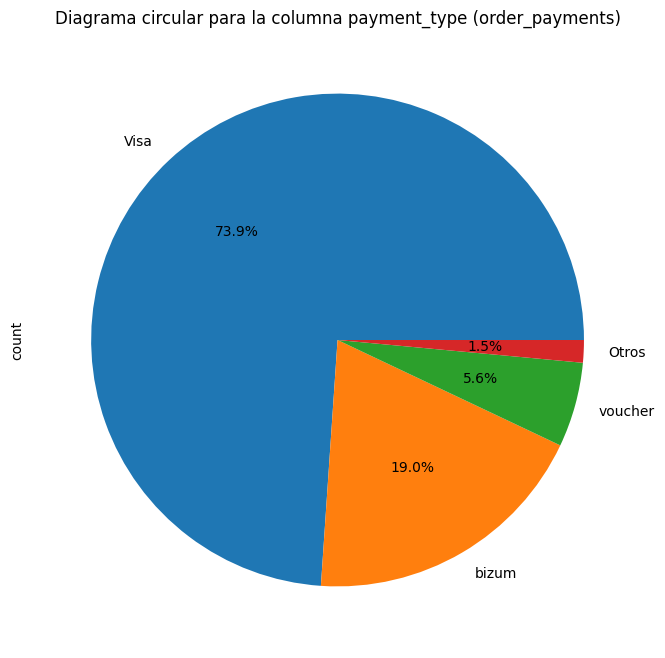

In [16]:
preprocess_and_analyze(order_payments_df, 'order_payments')

# **Conclucíon:**

datos están en bien estado.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Downloading processed dataframes to csv







In [ ]:

order_items_df_cleaned.to_csv('order_items_cleaned.csv', index=False)


geolocalizaciones_df_cleaned.to_csv('geolocalizaciones_cleaned.csv', index=False)


orders_df_cleaned.to_csv('orders_cleaned.csv', index=False)


products_df_cleaned.to_csv('products_cleaned.csv', index=False)


reviews_df_cleaned.to_csv('reviews_cleaned.csv', index=False)